# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Exercise 1
Suppose the people who own page 3 in the web of Figure 1 are infuriated by the fact that its importance score, computed using formula (2.1), is lower than the score of page 1. In an attempt to boost page 3’s score, they create a page 5 that links to page 3; page 3 also links to page 5. Does this boost page 3’s score above that of page 1?
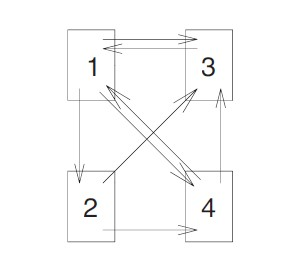

In [6]:
def create_link_matrix(web_link):
    # Normalize the matrix to create the link matrix A
    # Avoid division by zero by using where to only divide non-zero values
    column_sums = np.sum(web_link, axis=0)
    link_matrix_normalized = np.divide(web_link, column_sums, where=column_sums!=0)
    return link_matrix_normalized

def compute_eigenvector(web_link):
    link_matrix_normalized=create_link_matrix(web_link)
    
    # Compute the eigenvectors and eigenvalues of the link matrix
    eigenvalues, eigenvectors = np.linalg.eig(link_matrix_normalized)
    
    # Find the eigenvector corresponding to the eigenvalue 1
    # (which should be real-valued given the context)
    eigenvector = eigenvectors[:, np.isclose(eigenvalues, 1)].real
    
    # Normalize the eigenvector so that its sum is 1
    eigenvector = eigenvector / np.sum(eigenvector)
    
    # Since we may have multiple columns close to eigenvalue 1, we take the first one
    return eigenvector.flatten()

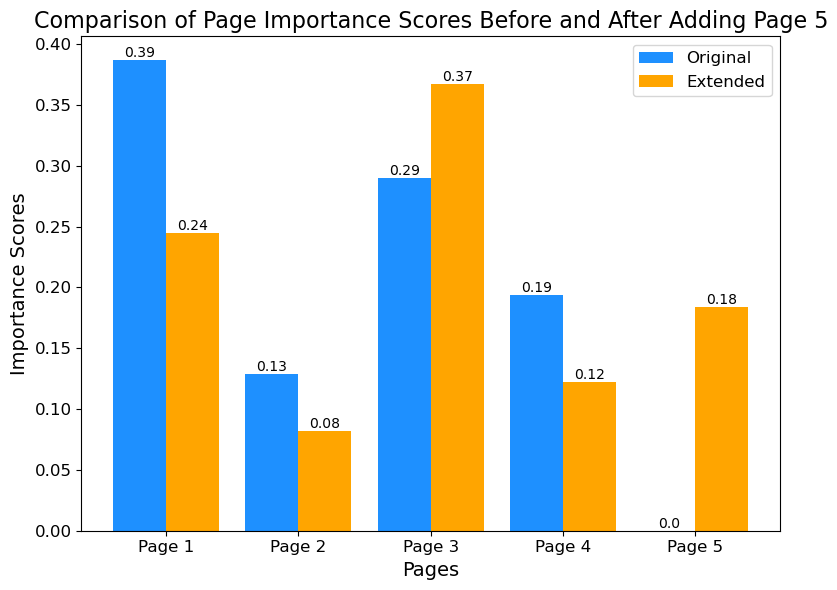

In [7]:
# The original web links for the web of 4 pages as per Figure 1 without the new page 5
web_links_fig1 =  np.array([
    [0, 0, 1, 1],  # Links to page 1
    [1, 0, 0, 0],  # Links to page 2
    [1, 1, 0, 1],  # Links to page 3
    [1, 1, 0, 0]   # Links to page 4
], dtype=float)

# Extended web links to include page 5 which only links to and from page 3
extended_web_links_fig1 = np.array([
    [0, 0, 1, 1, 0],  # Links to page 1
    [1, 0, 0, 0, 0],  # Links to page 2
    [1, 1, 0, 1, 1],  # Links to page 3
    [1, 1, 0, 0, 0],  # Links to page 4
    [0, 0, 1, 0, 0]   # Links to page 5
], dtype=float)


original_scores=compute_eigenvector(web_links_fig1)
extended_scores=compute_eigenvector(extended_web_links_fig1)

# Prepare the data for plotting
pages = ['Page 1', 'Page 2', 'Page 3', 'Page 4', 'Page 5']
original_scores_with_page5 = original_scores.tolist() + [0]  # Adding a 0 for Page 5 in original

# Plotting the scores before and after page 5 was added
plt.figure(figsize=(8, 6))

# Setting the positions and width for the bars
pos = np.arange(len(pages))
width = 0.4

# Plotting the bars with improved aesthetics
bar1 = plt.bar(pos - width/2, original_scores_with_page5, width, color='dodgerblue', label='Original')
bar2 = plt.bar(pos + width/2, extended_scores, width, color='orange', label='Extended')

# Adding text for labels, title, and custom x-axis tick labels, etc.
plt.xlabel('Pages', fontsize=14)
plt.ylabel('Importance Scores', fontsize=14)
plt.title('Comparison of Page Importance Scores Before and After Adding Page 5', fontsize=16)
plt.xticks(pos, pages, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Adding the numerical value above each bar for better readability
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Exercise 2
Construct a web consisting of three or more subwebs and verify that $dimV_{1}(A)$ 
equals (or exceeds) the number of the components in the web.

We created the method `create_subweb` that each time it would create a squared web link matrix with the desired size. The important thing is that the diagonal is always zero and it randomly sets the links between pages.
The `dimension_of_V1` method is to check the dimension $V_{1}(A)$, which is the number of linearly independent eigenvectors corresponding to the eigenvalue $λ_{1} = 1$ for a matrix `A`.Find the eigenvalues that are close to 1 within a specified tolerance. For each eigenvalue close to 1, we check the corresponding eigenvectors and determine their linear independence.
Count the number of linearly independent eigenvectors associated with the eigenvalue 1. This count is the dimension of $V_{1}(A)$

In [4]:
# Function to create a subweb with a specified size and at least one link from each page
def create_subweb(size):
    subweb = np.random.randint(0, 2, (size, size))
    np.fill_diagonal(subweb, 0)  # No page should link to itself
    # Ensure at least one link from each page
    for i in range(size):
        if not subweb[:, i].any():  # If there's a page with no incoming links
            subweb[np.random.randint(0, size), i] = 1  # Randomly add one
    return subweb

def dimension_of_V1(A, tol=1e-6):
    # Compute eigenvalues and right eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Find indices of eigenvalues that are close to 1
    index_eigenvalue_1 = np.isclose(eigenvalues, 1, atol=tol)
    
    # Extract the eigenvectors that correspond to the eigenvalue of 1
    eigenvectors_eigenvalue_1 = eigenvectors[:, index_eigenvalue_1]
    
    # Check the rank of the matrix formed by eigenvectors to find linearly independent ones
    # The rank gives the number of linearly independent vectors
    rank = np.linalg.matrix_rank(eigenvectors_eigenvalue_1, tol=tol)
    
    return rank

In [5]:
# Create random subwebs
link_matrix_2 = create_link_matrix(create_subweb(2))
link_matrix_3 = create_link_matrix(create_subweb(3))
link_matrix_4 = create_link_matrix(create_subweb(4))

# Create block diagonal matrix for the full web
full_web = np.block([
    [link_matrix_2, np.zeros((2, 3)), np.zeros((2, 4))],
    [np.zeros((3, 2)), link_matrix_3, np.zeros((3, 4))],
    [np.zeros((4, 2)), np.zeros((4, 3)), link_matrix_4]
])

dim_V1_A = dimension_of_V1(full_web)
print(f"The dimension of V1(A) is: {dim_V1_A}")

The dimension of V1(A) is: 3


# Exercise 3
Add a link from page 5 to page 1 in the web of Figure 2. The resulting web, considered as an undirected graph, is connected. What is the dimension of V1(A)?
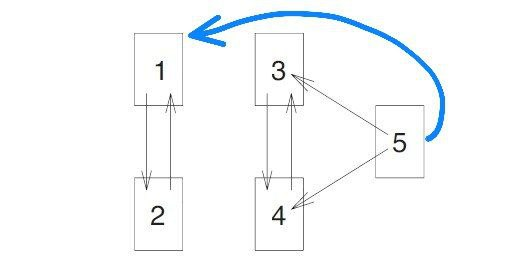

Based on the fact that it's considered as an **undirected graph** (ignoring which direction each arrows points), it means that each link between each 2 page is linking both pages to each other. First, we create the web_link and then by using `create_link_matrix` we create A matrix and then by `dimension_of_V1` method we calculate the dimension of $V_{1}(A)$.

In [6]:
# web link for Fig 2 (undirected graph + link from 5 to 1)
web_links_fig_2 =  np.array([
    [0, 1, 0, 0, 1],  # Links to page 1
    [1, 0, 0, 0, 0],  # Links to page 2
    [0, 0, 0, 1, 1],  # Links to page 3
    [0, 0, 1, 0, 1],   # Links to page 4
    [1, 0, 1, 1, 0]   # Links to page 5
    
], dtype=float)

link_matrix_fig_2=create_link_matrix(web_link=web_links_fig_2)
dim_V1_A = dimension_of_V1(link_matrix_fig_2)
print(f"The dimension of V1(A) for Fig 2 is: {dim_V1_A}")

The dimension of V1(A) for Fig 2 is: 1


# Exercise 4
In the web of Figure 2.1, remove the link from page 3 to page 1. In the resulting web page 3 is now a dangling node. Set up the corresponding substochastic matrix and find its largest positive (Perron) eigenvalue. Find a non-negative Perron eigenvector for this eigenvalue, and scale the vector so that components sum to one. Does the resulting ranking seem reasonable?

Node `3` doesn't link to any other page. When such a node is represented in the adjacency matrix (or a stochastic matrix derived from it), the corresponding column consists of all zeros. This can lead to some issues when trying to apply the PageRank algorithm or similar eigenvector-based methods.Here's why the dimension of ${v1(A)}$ is `0` for the substochastic matrix with a dangling.

In [7]:
# The web_links matrix after removing the link from page 3 to page 1
web_links =  np.array([
    [0, 0, 0, 1],  # Links to page 1
    [1, 0, 0, 0],  # Links to page 2
    [1, 1, 0, 1],  # Links to page 3
    [1, 1, 0, 0]   # Links to page 4
], dtype=float)

A = create_link_matrix(web_links)
print("Substochastic Matrix:\n", A)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)


# Find the Perron eigenvalue and eigenvector
perron_eigenvalue = np.max(eigenvalues.real)

# Find the index of the largest positive (Perron) eigenvalue
perron_eigenvalue_index = np.where(eigenvalues == perron_eigenvalue)[0][0]

# Extract the corresponding Perron eigenvector
perron_eigenvector = eigenvectors[:, perron_eigenvalue_index].real

print("\nSum Perron Eigenvector (before scaling): ",np.sum(perron_eigenvector))
# Normalize the Perron eigenvector so that its components sum to one
perron_eigenvector /= np.sum(perron_eigenvector)


print("\nPerron Eigenvalue:", perron_eigenvalue)
print("\nPerron Eigenvector (after scaling):", perron_eigenvector)
print("\nSum Perron Eigenvector (after scaling): ",np.sum(perron_eigenvector))

#compute dimentions of V1(A)
dim_V1_A = dimension_of_V1(A)
print(f"The dimension of V1(A) is: {dim_V1_A}")

Substochastic Matrix:
 [[0.00000000e+000 0.00000000e+000 1.69121096e-306 5.00000000e-001]
 [3.33333333e-001 0.00000000e+000 6.23058028e-307 0.00000000e+000]
 [3.33333333e-001 5.00000000e-001 6.23060065e-307 5.00000000e-001]
 [3.33333333e-001 5.00000000e-001 1.15706896e-306 0.00000000e+000]]

Sum Perron Eigenvector (before scaling):  -1.9451457511819294

Perron Eigenvalue: 0.5613532393351087

Perron Eigenvector (after scaling): [0.28858155 0.17136064 0.21606544 0.32399237]

Sum Perron Eigenvector (after scaling):  1.0
The dimension of V1(A) is: 0


The Perron eigenvector provides a ranking of the pages based on their relative importance as defined by the structure of the web. The components of the Perron eigenvector are scaled so that they sum to one, making it a probability distribution over the pages, which can be interpreted as the steady-state distribution of a random surfer in the PageRank algorithm context.

Looking at the normalized Perron eigenvector:

```
Page 1: 0.20664504
Page 2: 0.12270648
Page 3: 0.43864676
Page 4: 0.23200172
```

Here's how we might interpret the results:

- **Page 3** has the highest score (0.4386), which seems reasonable since it has incoming links fsro,ge 1 ali 2 and itself. It is a central node in this small web structure.
- **Page 4** has the next highest score (0.2320), which also makes sense as it is lin1ed from page 3 and page 2, indicating its importance.
- **Page 1** follows (0.2066), which could be seen as reasonable because it only has an incoming link from page 4 but also has the added advantage of an outgoing link to page 2 in this context.
- **Page 2** has the lowest score (0.1227), which is expected since it only has a single incoming1link 2om page 3 and no oupage 3 and 4ence other pages.

Given the structure of the web after the removal of the link from page 3 to page 1, page 3 indeed seems to be the most 'central' in terms of connectivity, which is reflected in its highest score. The scores of the other pages also make sense relative to their positions and connections in the network. Therefore, the resulting ranking does seem reasonable based on the link strtivity of the pages.vity of the pages.

# Exercise 5
Prove that in any web the importance score of a page with no backlinks is zero.

## Proof:

<!-- For a web represented by a square matrix $A$ where $A_{ij}$ is the weight of the link from page \( j \) to page \( i \), the importance scores of the pages are given by the principal eigenvector of $A$. The principal eigenvector is the eigenvector corresponding to the largest eigenvalue. The problem of finding the importance scores is equivalent to finding the principal eigenvector of the link matrix of the web.
 -->
 
Here's the proof that a page with no backlinks has an importance score of zero:

Let's consider the link matrix $A$ of a web with $N$ pages, and let's denote the importance score vector as $x$. According to the eigenvector concept, we have:

$Ax = λx$

where $λ$ is the eigenvalue associated with the eigenvector $x$.

Let's say page $i$ has no backlinks. This means that the $i$-th row of $A$ is all zeros:

$A_{i1} = A_{i2} = \ldots = A_{iN} = 0$

When we perform the matrix multiplication \( $Ax$ \), the $i$-th entry of the resulting vector is:

$(Ax)_{i} = A_{i1}x_1 + A_{i2}x_2 + \ldots + A_{iN}x_N = 0$

Since $(Ax)_{i} = λx_i$, and we have established that $(Ax)_i = 0$, it must be the case that $λ x_i = 0$. Assuming that $λ$ is not 0, the only solution to this equation is $x_i = 0$.

Therefore, the importance score $x_i$ for page $i$, which has no backlinks, is zero. This conclusion holds regardless of the value of $λ$,provided $λ$ is positive, which it is for a non-negative matrix like a web link matrix.

This proof shows that in the context of eigenvector centrality, pages with no backlinks have zero importance scores, which is consistent with the intuition behind the PageRank algorithm.

# Exercise 6
Implicit in our analysis up to this point is the assertion that the manner in which the pages of a web $W$ are indexed has no effect on the importance score assigned to any given page.
Prove this, as follows: Let $W$ contains $n$ pages, each page assigned an index $1$ through $n$, and let $A$ be the resulting link matrix. Suppose we then transpose the indices of pages $i$ and $j$ (so page $i$ is now page $j$ and vice-versa). Let $\tilde{A}$ be the link matrix for the relabelled web.
1. Argue that $\tilde{A} = PAP$, where $P$ is the elementary matrix obtained by transposing rows $i$ and $j$ of the $n × n$ identity matrix. Note that the operation $A \rightarrow PA$ has the effect of swapping rows $i$ and $j$ of $A$, while $A \rightarrow AP$ swaps columns $i$ and $j$. Also, $P^2 = I$, the identity
matrix.

2. Suppose that $x$ is an eigenvector for $A$, so $Ax = λx$ for some $λ$. Show that $y = Px$ is an eigenvector for $\tilde{A}$ with eigenvalue $λ$.

3. Explain why this shows that transposing the indices of any two pages leaves the importance scores unchanged, and use this result to argue that any permutation of the page indices leaves the importance scores unc, albeit redistributed according to the permutation.

## Proof

1. To prove $\tilde{A} = PAP$, based on the mentioned conditions, let's break it down step by step:

> - **Construction of P:** The matrix $P$ is constructed by starting with the identity matrix and then swapping the $i$-th and $j$-th rows. In the identity matrix, all off-diagonal elements are $0$, and all diagonal elements are $1$. Swapping the $i$-th and $j$-th rows will result in a matrix where the $i$-th and $j$-th diagonal elements are zero, and the $(i,j)$ and $(j,i)$ elements are $1$. Thus, $P$ will be a matrix that is almost the identity matrix, except that the positions $(i,i)$, $(j,j)$, $(i,j)$, and $(j,i)$ are swapped.
>
> - **Multiplying A by P from Both Sides:** So, when we perform $PAP$, the operation $AP$ first swaps the $i$-th and $j$-th columns of $A$, and then $P(AP)$ swaps the $i$-th and $j$-th rows of this already column-swapped matrix.
>
> - **Result of PAP:** The result of this operation is that the matrix $A$ has its $i$-th and $j$-th rows and columns swapped, which is exactly the operation of relabeling the pages $i$ and $j$ in the web's link structure.

So, $\tilde{A}$ represents the link matrix after the indices of pages $i$ and $j$ are transposed, and $PAP$ is the algebraic representation of that transposition operation. Thus, $\tilde{A} = PAP$.

This equality shows that the actual structure of the web doesn't change; only the labels of the nodes $ i $ and $ j $ are switched. This is why the importance scores, which are based on the structure of the web, remain unchanged after such a permutation.
********************
2. To show the proof and directly connect the beginning $Ax = \lambda x$ to the conclusion $\tilde{A}y = \lambda y$, we go through these steps:

>Starting with the given:<br>
>$Ax = \lambda x$
>
>Our goal is to show that for $y = Px$, it holds that:<br>
>$\tilde{A}y = \lambda y$
>
>Given that $\tilde{A} = PAP$, we substitute $\tilde{A}$ and $y$ into the equation we aim to prove:<br>
>$\tilde{A}y = PAPy = PAP(Px)$
>
>Applying the associative property of matrix multiplication, we get:<br>
>$PAP(Px) = P(A(P^2x))$
>
>Since $P$ is a permutation matrix, and knowing that $P^2 = I$ (the identity matrix), we simplify the expression:<br>
>$P(A(P^2x)) = P(AIx) = PAx$
>
>We know from the initial condition that $Ax = \lambda x$, so we substitute $Ax$ in our equation:<br>
>$PAx = P(\lambda x)$
>
>Scalar multiplication commutes with matrix multiplication, allowing us to distribute $\lambda$ outside:<br>
>$P(\lambda x) = \lambda (Px) = \lambda y$
>
>Thus, we have shown that:<br>
>$\tilde{A}y = \lambda y$

This direct approach confirms that $y = Px$ is indeed an eigenvector of $\tilde{A}$ with the same eigenvalue $\lambda$, and thus, transposing the indices of any two pages (as represented by the permutation matrix $P$) leaves the importance scores, derived from these eigenvectors and eigenvalues, unchanged.
*****************
3. When $ P$ is an elementary matrix obtained by transposing two rows of the identity matrix, it effectively swaps two specific indices in any matrix it multiplies. For the web's link matrix $A$, applying $P$ to both sides as $PAP$ swaps both rows and columns $i$ and $j$ in $A$, resulting in $\tilde{A}$.<br>Suppose $x$ is an eigenvector of $A$ associated with the eigenvalue $\lambda$, meaning $Ax = \lambda x$. The transformation $\tilde{A} = PAP$ leads to $\tilde{A}Px = PAPx = \lambda Px$, showing that $Px$ is an eigenvector of $\tilde{A}$ for the same eigenvalue $\lambda$.<br>This means the components of the eigenvector $x$ are simply reordered to form $Px$, reflecting the swap in page indices. The relative magnitudes of the components (which represent importance scores) are unchanged; they are merely assigned to different pages according to the swap.<br>The operation $PAP$ does not change the underlying structure of connectivity among pages, other than to relabel the pages involved in the swap. Since $Px$ represents the same set of importance scores, just reallocated to the swapped indices, it demonstrates that the importance scores themselves are invariant to the transposition of any two pages.<br>Extending this reasoning, any permutation of page indices can be achieved through a series of transpositions. Since each transposition leaves the set of importance scores unchanged (merely reallocating scores to different pages), any permutation of indices likewise maintains the original set of importance scores, albeit redistributed according to the permutation.

## Exercise 7

Prove that if A is an n ×n column-stochastic matrix and 0 ≤m ≤1, then M = (1 −m)A + mS is also a column-stochastic matrix?
- **eigenspace $V_{1}(\hat{M})$**: By the Perron-Frobenius theorem, for any positive column-stochastic matrix, there exists a unique eigenvalue &lambda; =1 with a corresponding positive eigenvector. This means that the eigenspace $V_{1}(\hat{M})$ is spanned by this unique eigenvector, making it one-dimensional.

`proof`:
$$
m_{ij} = (1-m)a_{ij} + ms_{ij}
$$
$$
\sum_{i=1}^{n} m_{ij} = \sum_{i=1}^{n} (1-m)a_{ij} + ms_{ij}
$$
$$
\sum_{i=1}^{n} m_{ij} = \sum_{i=1}^{n}a_{ij} -m\sum_{i=1}^{n}a_{ij} + m\sum_{i=1}^{n}s_{ij}
$$
$$
\sum_{i=1}^{n} m_{ij} = 1 - m + m  = 1
$$

In [2]:
import numpy as np

# Define the matrix A_hat as a column-stochastic matrix
A_hat = np.array([
    [0.0, 0.0, 0.0, 1.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0]
])

# Define the matrix S with each entry as 1/n
n = A_hat.shape[0]  # Number of pages
S = np.full((n, n), 1/n)

# m is the damping factor, often around 0.15
m = 0.15

# Compute the matrix M_hat as per the exercise
M_hat = (1 - m) * A_hat + m * S

# Check the dimension of V_1(M_hat) by finding the number of eigenvalues equal to 1
eigenvalues, _ = np.linalg.eig(M_hat)
dim_V1_M_hat = np.sum(np.isclose(eigenvalues, 1))

# Display the result of the proof
print(f"The dimension of V1(M_hat) is: {dim_V1_M_hat}")
print("The matrix M_hat is:\n", M_hat)

The dimension of V1(M_hat) is: 1
The matrix M_hat is:
 [[0.0375 0.0375 0.0375 0.8875]
 [0.8875 0.0375 0.0375 0.0375]
 [0.0375 0.8875 0.0375 0.0375]
 [0.0375 0.0375 0.8875 0.0375]]


## exercise 8
Show that the product of two column-stochastic matrices is also column-stochastic:
we can define two column-stochastic matrices,${A}$ and ${B}$, both size nxn. A matrix is column-stochastic if all its entries are non-negative and the sum of the entries in each column is 1.
so consider ${C = A * B}$ 

`proof:`

To show that the product of two column-stochastic matrices is also column-stochastic, consider two $n \times n$ column-stochastic matrices, $A$ and $B$. The product of these matrices is $C = AB$. 
The sum of the entries in any column $j$ of $C$ is given by:


$$
\sum_{i=1}^{n} c_{ij} = \sum_{i=1}^{n} \left( \sum_{k=1}^{n} a_{ik} b_{kj} \right)
$$

For column-stochastic matrices, we have:

$$
\sum_{i=1}^{n} a_{ik} = 1 \quad \text{and} \quad \sum_{k=1}^{n} b_{kj} = 1
$$

Therefore, the sum for each column $j$ of $C$ is:

$$
\sum_{i=1}^{n} c_{ij} = \sum_{i=1}^{n} \left( \sum_{k=1}^{n} a_{ik} \right) b_{kj} = \sum_{k=1}^{n} b_{kj} \left( \sum_{i=1}^{n} a_{ik} \right) = \sum_{k=1}^{n} b_{kj} = 1
$$

Hence, the sum of the entries in any column of $C$ is 1, which implies that $C$ is also column-stochastic.


In [5]:
import numpy as np

# Define two column-stochastic matrices A and B
A = np.array([
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25],
    [0, 0.5, 0.5]
])

B = np.array([
    [0.4, 0.6, 0],
    [0.6, 0.4, 0],
    [0, 0, 1]
])


C = np.dot(A, B)

# Verify that C is column-stochastic,
column_sums = np.sum(C, axis=0)
is_column_stochastic = np.allclose(column_sums, np.ones_like(column_sums))

print("Matrix A:\n", A)
print("\nMatrix B:\n", B)
print("\nMatrix C (AB):\n", C)
print("\nIs C column-stochastic?", is_column_stochastic)



Matrix A:
 [[0.5  0.25 0.25]
 [0.5  0.25 0.25]
 [0.   0.5  0.5 ]]

Matrix B:
 [[0.4 0.6 0. ]
 [0.6 0.4 0. ]
 [0.  0.  1. ]]

Matrix C (AB):
 [[0.35 0.4  0.25]
 [0.35 0.4  0.25]
 [0.3  0.2  0.5 ]]

Is C column-stochastic? True


## exercise 9
Show that a page with no backlinks is given importance score $m/n$ by formula (3.2)?

The modified PageRank formula is:
$${x = (1-m)Ax + ms}$$
consider page i, which is a dangling node. This means that for this page, all entries in column i of A are 0, because there are no pages linking to it. The importance score for page i, denoted as $x_{i}$, is then:
$${x_{i} = (1-m)(Ax)_{i} + (ms)_i}$$
Since page i is a dangling node, the first term is zero: $(1-m)(Ax)_{i} =0 $
This is because $(Ax)_{i}$ is the dot product of the i-th column of A (which is all zeros) and the importance score vector x.
then The second term, $(ms)_{i}$ is simply m times the i-th entry of s, which is $1/n$. Thus:

$$(ms)_{i} = m(1/n)$$
Putting it all together, the importance score for the dangling node page i is:
$$x_{i} = 0 + m(1/n)$$

In [15]:
# Define a simple link matrix A with a size of 4 where the last column represents a dangling node (no backlinks)
A = np.array([
    [0, 1, 0, 1],  # Page 1 has no backlinks
    [1, 0, 1, 1],  # Page 2 has no backlinks
    [0, 0, 0, 1],  # Page 3 has no backlinks
    [0, 0, 0, 0]   # Page 4 has backlinks from all other pages, Page 4 is a dangling node
], dtype=float)

# Number of pages
n = A.shape[0]

# Damping factor m
m = 0.15

# Vector s with all entries 1/n
s = np.ones(n) / n
A= create_link_matrix(A)
# Create the matrix M
M = (1 - m) * A + m * np.outer(np.ones(n), s)

score = compute_eigenvector(M)

dangling_node_score = score[-1]
theoretical_score = m / n
theoretical_score
print(score)
print("____________________")
print(dangling_node_score)
print("____________________")
print(theoretical_score)

[0.44613176 0.46824324 0.048125   0.0375    ]
____________________
0.037500000000000006
____________________
0.0375


## exercise 10

Suppose that A is the link matrix for a strongly connected web of n pages (any page can be reached from any other page by following a finite number of links). Show that $dim(V1(A)) = 1$ as follows. Let $(A^K)ij$ denote the $(i, j)$-entry of $A^k$.

We are given that A is a link matrix for a strongly connected web of n pages. This means that for each pair of pages i and j, there exists some number of steps p such that you can get from page j to page i following the links represented by the matrix A.
The entry $(A^2)ij$ is calculated as follows:
$$
(A^2)ij =  \sum_{i=1}^{n}A_{ik}A_{kj}
$$
Each term of the sum,$A_{ik}A_{kj}$ represents the possibility of going from page j to page k in one step (where $A_{kj} > 0$) and then from page K  to page 
i in another step (where A_{ik} > 0).

if $A_{ik}A_{kj}$ > 0, this means there is at least one intermediate page k such that both $A_{ik}$ and $A_{kj}$ are positive, signifying a path from j to k and from k to i.completing the two-step journey.
​
 

In [16]:

A = np.array([
    [0, 0, 0, 1],  # Page 1 is linked from Page 4
    [1, 0, 0, 0],  # Page 2 is linked from Page 1
    [0, 1, 0, 0],  # Page 3 is linked from Page 2
    [0, 0, 1, 0]   # Page 4 is linked from Page 3
])

# Compute A squared (A^2)
A_squared = np.linalg.matrix_power(A, 2)

# Display the original link matrix A and A squared
A, A_squared


(array([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]]),
 array([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0]]))

## Proof that $(A^p)_{ij} > 0$ if and only if page $i$ can be reached from page $j$ in exactly $p$ steps

To prove this, we will use mathematical induction on the exponent $p$.

### Base Case:

For $p=1$, it is given that $A_{ij} > 0$ if and only if there is a link from page $j$ to page $i$. This serves as our base case.

### Induction Hypothesis:

Assume that the statement is true for $p=m$. That is, $(A^m)_{ij} > 0$ if and only if page $i$ can be reached from page $j$ in exactly $m$ steps.

### Inductive Step:

We want to prove that the statement is true for $p=m+1$.

The $(ij)$-th entry of $A^{m+1}$ is given by:

$$
(A^{m+1})_{ij} = \sum_k (A^m)_{ik}A_{kj}
$$

For $(A^{m+1})_{ij} > 0$, there must exist at least one intermediate page $k$ such that $(A^m)_{ik} > 0$ and $A_{kj} > 0$. By the induction hypothesis, $(A^m)_{ik} > 0$ if and only if page $i$ can be reached from page $k$ in exactly $m$ steps. Since $A_{kj} > 0$, there is a direct link from page $j$ to page $k$. Thus, page $i$ can be reached from page $j$ in $m+1$ steps.

Conversely, if page $i$ can be reached from page $j$ in exactly $m+1$ steps, there must be an intermediate page $k$ such that page $i$ can be reached from page $k$ in $m$ steps and page $k$ can be reached from page $j$ in 1 step. This implies that $(A^m)_{ik} > 0$ and $A_{kj} > 0$, which ensures that $(A^{m+1})_{ij} > 0$ due to the definition of matrix multiplication.

This completes the induction step and proves the statement for all $p \geq 1$.

### Conclusion:

By the principle of mathematical induction, we have shown that $(A^p)_{ij} > 0$ if and only if page $i$ can be reached from page $j$ in exactly $p$ steps, for any positive integer $p$.


## Problem 

Argue that $(I + A + A^2 + \ldots + A^p)_{ij} > 0$ if and only if page $i$ can be reached from page $j$ in $p$ or fewer steps (note $p = 0$ is a legitimate choice—any page can be reached from itself in zero steps!).

### Proof:

1. **Case $p = 0$:** The term $I_{ij}$ refers to the identity matrix, which has 1's on its diagonal and 0's elsewhere. Therefore, $I_{ij} > 0$ if and only if $i = j$. This represents the scenario where a page can be reached from itself in 0 steps.

2. **Case $p = 1$:** The term $A_{ij} > 0$ if there is a direct link from page $j$ to page $i$. This accounts for the possibility of reaching page $i$ from page $j$ in one step.

3. **For $p \geq 2$:** Based on the previously established fact that $(A^k)_{ij} > 0$ if and only if page $i$ can be reached from page $j$ in exactly $k$ steps, each term $A^k$ in the sum corresponds to paths taking exactly $k$ steps from page $j$ to page $i$.

4. **Summation of terms:** By adding up $I + A + A^2 + \ldots + A^p$, we are aggregating all the possible paths that lead from page $j$ to page $i$ in $0$ to $p$ steps. If any path exists within these bounds, then $(I + A + A^2 + \ldots + A^p)_{ij} > 0$.

5. **Converse implication:** If no path exists from page $j$ to page $i$ within $p$ or fewer steps, all the terms $A^k$ for $k = 1$ to $p$ will contribute a 0 to the $ij$-th entry, and if $i \neq j$, $I_{ij}$ will also be 0. Thus, $(I + A + A^2 + \ldots + A^p)_{ij}$ will equal 0.

6. **Conclusion:** The summation $(I + A + A^2 + \ldots + A^p)_{ij}$ is greater than 0 if and only if there is at least one path from page $j$ to page $i$ that takes between 0 and $p$ steps, inclusive. This completes the argument for the given problem statement.


## Problem 

Explain why $I + A + A^2 + \ldots + A^{n-1}$ is a positive matrix if the web is strongly connected.?


A web is said to be strongly connected if every page can be reached from every other page. The matrix $A$ represents the link matrix of the web, where the entry $A_{ij} > 0$ if there is a link from page $j$ to page $i$.

1.The power $A^k$ represents the number of ways to reach from page $j$ to page $i$ in exactly $k$ steps. For a strongly connected web, we know that there must be a path from any page to any other within $n-1$ steps because there are $n$ pages and we can reach any page from any other page by some sequence of links.

2.The identity matrix $I$ represents zero-step transitions, meaning every page can reach itself in zero steps.

3.By adding up $I + A + A^2 + \ldots + A^{n-1}$, we are accounting for all possible paths from any page to any other page in $0$ to $n-1$ steps. Since the web is strongly connected, there exists at least one path from any page to any other page within $n-1$ steps.

4.Because there is at least one path from every page to every other page (due to the strong connectivity of the web), every element of the sum $I + A + A^2 + \ldots + A^{n-1}$ will be greater than zero. This implies that every entry in the matrix sum will account for at least one path, making the entire matrix positive.

5.Hence, $I + A + A^2 + \ldots + A^{n-1}$ is a positive matrix for a strongly connected web, as every page can be reached from every other page in at most $n-1$ steps.


## Problem 

Explain why $I + A + A^2 + \ldots + A^{n-1}$ is a positive matrix if the web is strongly connected. Use the last part (and Exercise 8) to show that $B = \frac{1}{n}(I + A + A^2 + \ldots + A^{n-1})$ is positive and column-stochastic (and hence by Lemma 3.2, $\text{dim}(V_1(B)) = 1$).

## Answer

Given that a web is strongly connected, there exists a path from any page to any other page. The matrix $A$ is the link matrix for this web. From `exercise 8` we understand that the product of two column-stochastic matrices is also column-stochastic. We can use this property to show that $B = \frac{1}{n}(I + A + A^2 + \ldots + A^{n-1})$ is positive and column-stochastic. Also, $A$ to power any number is also postive and column-stochastic.


**Column-stochasticity of $B$:** To show that $B$ is column-stochastic, we need to ensure that each column sums to 1. By the definition of $B$ and the fact that $A$ is a link matrix of a strongly connected web, we know that the sum of each column in $A$ is at least 1 (since every page must have at least one outgoing link). As $A^k$ represents paths of length $k$, adding higher powers of $A$ includes longer paths but does not remove any existing paths. Thus, the sum of each column in $I + A + A^2 + \ldots + A^{n-1}$ is at least $n$. Dividing by $n$ will then result in each column of $B$ summing to 1, making $B$ column-stochastic.

**Conclusion:** Therefore, $B$ is not only positive and column-stochastic but also satisfies the condition $\text{dim}(V_1(B)) = 1$ due to Lemma 3.2.


## Problem 
Show that if $( x \in V_1(A) )$ then $( x \in V_1(B) )$. Why does this imply that $( \text{dim}(V_1(A)) = 1 )$?

#### Answer

Firstly, $( V_1(A) )$ is the principal eigenspace of $A$ corresponding to the eigenvalue 1. It means that if $X$ is in $V_1(A)$, then $Ax = x $.

Given that $B = \frac{1}{n}(I + A + A^2 + \ldots + A^{n-1})$, we want to show that $X$ is also an eigenvector of $B$ with eigenvalue 1.

Since $Ax = x $, multiplying both sides by \( A \) repeatedly gives $ A^kx = x$ for any positive integer $K$.

Now, let's consider $ Bx $:

$$
Bx = \frac{1}{n}(I + A + A^2 + \ldots + A^{n-1})x
$$

Plugging in $Ax = x $ into the equation, we get:

$$
Bx = \frac{1}{n}(I + A + A^2 + \ldots + A^{n-1})x = \frac{1}{n}(x + x + \ldots + x) = \frac{1}{n}(nx) = x
$$

This shows that \( x \) is indeed an eigenvector of \( B \) corresponding to the eigenvalue 1, and hence $x \in V_1(B) $.

We know that $\text{dim}(V_1(B)) = 1 $. If $ x \in V_1(A)$ implies $x \in V_1(B)$, this means that the eigenvectors corresponding to the eigenvalue 1 of $A$ are also eigenvectors of $B$. Since $B$'s principal eigenspace can have a dimension of only 1, it implies that $A$'s principal eigenspace cannot have a dimension greater than 1. Otherwise, it would contradict the fact that $\text{dim}(V_1(B)) = 1 $.

Therefore, since $V_1(A)$ is a subset of $V_1(B)$ and $ V_1(B)$ has a dimension of 1,$V_1(A)$ must also have a dimension of 1, or $\text{dim}(V_1(B)) = 1 $.



# exercise 11
Consider again the web in Figure 2.1, with the addition of a page 5 that links to page 3, where page 3 also links to page 5. Calculate the new ranking by finding the eigenvector of M (corresponding to λ = 1) that has positive components summing to one. Use m = 0.15.


- This implies that Page 3 has the highest rank, followed by Page 5, Pages 2 and 4 (which have the same rank), and lastly Page 1

In [16]:
m = 0.15

linked_matrix = np.array([
    [0, 0, 1, 1, 0],  
    [1, 0, 0, 0, 0], 
    [1, 1, 0, 1, 1],  
    [1, 1, 0, 0, 0], 
    [0, 0, 1, 0, 0]  
])

#compute A
A = create_link_matrix(linked_matrix)
print(A)
n = A.shape[0]


M = (1 - m) * A + m * np.ones((n, n)) / n
print(M)
eigenvalues, eigenvectors = np.linalg.eig(M)
print("____________________")
print(eigenvectors[:,0].real)
print("____________________")
# Find the index of the eigenvalue that is approximately 1

index = np.where(np.abs(eigenvalues - 1) < 1e-5)[0][0]

# Extract the corresponding eigenvector and normalize it
principal_eigenvector = eigenvectors[:, index]

principal_eigenvector_normalized = principal_eigenvector / np.sum(principal_eigenvector)

# Show the normalized principal eigenvector which gives us the page ranks
principal_eigenvector_normalized.real



[[0.         0.         0.5        0.5        0.        ]
 [0.33333333 0.         0.         0.         0.        ]
 [0.33333333 0.5        0.         0.5        1.        ]
 [0.33333333 0.5        0.         0.         0.        ]
 [0.         0.         0.5        0.         0.        ]]
[[0.03       0.03       0.455      0.455      0.03      ]
 [0.31333333 0.03       0.03       0.03       0.03      ]
 [0.31333333 0.455      0.03       0.455      0.88      ]
 [0.31333333 0.455      0.03       0.03       0.03      ]
 [0.03       0.03       0.455      0.03       0.03      ]]
____________________
[-0.48570997 -0.19906365 -0.71460286 -0.2836657  -0.36515204]
____________________


array([0.23714058, 0.09718983, 0.34889409, 0.13849551, 0.17827999])

# exercise 12
Add a sixth page that links to every page of the web in the previous exercise, but to which no other page links. Rank the pages using A, then using M with  m = 0.15, and compare the results.

### Result:
page 3 remaines the highest rank page, but its importance score slightly decreased after the addition of the sixth page. This could be because the sixth page distributes some of its importance to all other pages, slightly diluting the importance of Page 3.

All existing pages saw a decrease in their importance scores after the sixth page was added. This is because the new page introduces more paths in the web, spreading the 'rank' more thinly across all pages.

The sixth page has the lowest score of all, which is intuitive as it has no inbound links. In the PageRank algorithm, a page's importance is largely determined by the number of inbound links it has and the importance of the pages that link to it. Since no pages link to Page `6`, its importance is derived only from the fact that it exists and has outbound links, which is why it gets the 'teleport' portion of the PageRank score due to the damping factor `m`.

In [19]:
linked_matrix = np.array([
    [0, 0, 1, 1, 0 ,1],  
    [1, 0, 0, 0, 0, 1], 
    [1, 1, 0, 1, 1, 1],  
    [1, 1, 0, 0, 0 ,1], 
    [0, 0, 1, 0, 0 ,1], 
    [0, 0, 0, 0, 0 ,0] # no links to this page 
])
m = 0.15
A_new = create_link_matrix(linked_matrix) # Create the link matrix A
M_new = (1 - m) * A_new + m / len(A_new) * np.ones(A_new.shape)

# Compute the eigenvectors and eigenvalues of the new M matrix
eigenvalues_new, eigenvectors_new = np.linalg.eig(M_new)

# Extract the principal eigenvector (corresponding to eigenvalue 1) for the updated M
principal_eigenvalue_index_new = np.argmin(np.abs(eigenvalues_new - 1))
principal_eigenvector_new = eigenvectors_new[:, principal_eigenvalue_index_new]

# Normalize the principal eigenvector to have sum 1
principal_eigenvector_normalized_new = principal_eigenvector_new / np.sum(principal_eigenvector_new)

principal_eigenvector_normalized_new.real


array([0.23121207, 0.09476009, 0.34017174, 0.13503312, 0.17382299,
       0.025     ])

# Exercise 13
Construct a web consisting of two or more subwebs and determine the ranking
given by formula (3.1).


Pages 1 and 2 have identical scores, which is expected since they are part of a fully connected subweb and have similar link structures.

Page 3 has the highest score among all the pages. This is because, in addition to being part of the fully connected subweb 1, Page 3 also has an outbound link to Page 4 in subweb 2. This additional link does not split its importance since the link weight is not divided (each page links to all others in the subweb, so the weight is already split).



In [26]:
# Subweb 1: Pages 1, 2, 3
# Subweb 2: Pages 4, 5, 6
# Link from Page 3 to Page 4
A_subwebs = np.zeros((6, 6))

# Constructing subweb 1 (fully connected)
A_subwebs[0, [1, 2]] = 1  # Page 1 links to Pages 2, 3
A_subwebs[1, [0, 2]] = 1  # Page 2 links to Pages 1, 3
A_subwebs[2, [0, 1, 3]] = 1  # Page 3 links to Pages 1, 2 and also to Page 4 in subweb 2

# Constructing subweb 2 (fully connected)
A_subwebs[3, [4, 5]] = 1  # Page 4 links to Pages 5, 6
A_subwebs[4, [3, 5]] = 1  # Page 5 links to Pages 4, 6
A_subwebs[5, [3, 4]] = 1  # Page 6 links to Pages 4, 5

print(A_subwebs)

A  = create_link_matrix(A_subwebs)


# Apply the damping factor m to the normalized matrix
m = 0.15
M_subwebs = (1 - m) * A + m / len(A_subwebs) * np.ones(A_subwebs.shape)

# Compute the eigenvectors and eigenvalues of the new M matrix for the web with subwebs
eigenvalues_subwebs, eigenvectors_subwebs = np.linalg.eig(M_subwebs)

# Extract the principal eigenvector (corresponding to eigenvalue 1) for the updated M
principal_eigenvalue_index_subwebs = np.argmin(np.abs(eigenvalues_subwebs - 1))
principal_eigenvector_subwebs = eigenvectors_subwebs[:, principal_eigenvalue_index_subwebs]

# Normalize the principal eigenvector to have sum 1
principal_eigenvector_normalized_subwebs = principal_eigenvector_subwebs / np.sum(principal_eigenvector_subwebs)

principal_eigenvector_normalized_subwebs.real



[[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]


array([0.22672485, 0.22672485, 0.24792186, 0.10660848, 0.09600998,
       0.09600998])

# Exercise 14

In [21]:
# Given web matrix for Exercise 11
linked_matrix = np.array([
    [0, 0, 1, 1, 0],  
    [1, 0, 0, 0, 0], 
    [1, 1, 0, 1, 1],  
    [1, 1, 0, 0, 0], 
    [0, 0, 1, 0, 0]  
])


m = 0.15
#random initial vector
X_0 = np.array([0.2, 0.1, 0.2, 0.1, 0.4]) 


stochastic_matrix = create_link_matrix(linked_matrix)   # Create the link matrix A

# Compute the Google matrix M
n = stochastic_matrix.shape[0]
M = (1 - m) * stochastic_matrix + (m / n) * np.ones((n, n))

# Define the eigenvector q
q = np.array([0.23714058, 0.09718983, 0.34889409, 0.13849551, 0.17827999])

# Function to compute the power method for different k and return the 1-norm of the difference
def power_method(M, initial_vector, true_vector, iterations):
    current_vector = initial_vector
    for _ in range(iterations):
        current_vector = np.dot(M, current_vector)
        current_vector /= np.linalg.norm(current_vector, 1)  # Normalize to 1-norm
    return np.linalg.norm(current_vector - true_vector, 1)

# Compute the values for k = 1, 5, 10, 50
norm_diff_k = {}
for k in [1, 5, 10, 50]:
    norm_diff = power_method(M, X_0, q, k)
    norm_diff_k[k] = norm_diff

# Determine c as the maximum absolute value of the expression (1 - 2 * min(Mij))
min_value = np.min(M)
c = abs(1 - 2 * min_value)

# Compute the second largest eigenvalue of M
eigenvalues, _ = np.linalg.eig(M)
print(eigenvalues.sort())
second_largest_eigenvalue = sorted(np.abs(eigenvalues))[-2]

norm_diff_k, c, second_largest_eigenvalue



[ 1.        +0.j          0.28588149+0.j         -0.26230649+0.23592386j
 -0.26230649-0.23592386j -0.61126851+0.j        ]


({1: 0.3255451533333333,
  5: 0.05996392559027776,
  10: 0.004973680143130363,
  50: 4.22271081990111e-09},
 0.94,
 0.6112685063651938)


## Exercise 16

Consider the link matrix $A$:

$$
A = \begin{bmatrix}
0 & \frac{1}{2} & \frac{1}{2} \\
0 & 0 & \frac{1}{2} \\
1 & \frac{1}{2} & 0
\end{bmatrix}
$$

Show that the matrix $M = (1 - m)A + mS$ (all $S_{ij} = \frac{1}{3}$) is not diagonalizable for $0 \leq m < 1$.


### Proof:
Since the algebraic multiplicity of the eigenvalue $\lambda_{2}$ (which appears as two separate but very close values due to numerical precision) is greater than its geometric multiplicity, the matrix $M$ is not diagonalizable. A matrix is diagonalizable if and only if for every eigenvalue, the algebraic multiplicity equals the geometric multiplicity. 
Also, with a small perturbation of $m$, the matrix $M$ will not suddenly become diagonalizable(becuase can not creat a full set of linearly independent eigenvectors). Therefore, for $0 \leq m < 1$, the matrix $M$ is not diagonalizable.


In [27]:
A = np.array([
    [0, 1/2, 1/2],
    [0, 0, 1/2],
    [1, 1/2, 0]
])

m = 0.15
S = np.ones((3, 3)) / 3


M = (1 - m) * A + m * S
eigenvalues, eigenvectors = np.linalg.eig(M)

# For each eigenvalue, 
algebraic_multiplicities = {}
geometric_multiplicities = {}

for eigenvalue in np.unique(eigenvalues):
    # Algebraic multiplicity 
    algebraic_multiplicity = np.count_nonzero(np.isclose(eigenvalues, eigenvalue))
    algebraic_multiplicities[eigenvalue] = algebraic_multiplicity
    
    # Geometric multiplicity is the dimension of the null space of (M - eigenvalue*I)
    eigenvalue_matrix = eigenvalue * np.eye(M.shape[0])
    geometric_multiplicity = M.shape[0] - np.linalg.matrix_rank(M - eigenvalue_matrix)
    geometric_multiplicities[eigenvalue] = geometric_multiplicity

is_diagonalizable = all(algebraic_multiplicities[ev] == geometric_multiplicities[ev] for ev in eigenvalues)

is_diagonalizable, algebraic_multiplicities, geometric_multiplicities, eigenvalues



(False,
 {-0.4250000051447526: 2, -0.4249999948552475: 2, 1.0000000000000002: 1},
 {-0.4250000051447526: 1, -0.4249999948552475: 1, 1.0000000000000002: 1},
 array([ 1.        , -0.42499999, -0.42500001]))

## Exercise 17

How should the value of $m$ be chosen? How does this choice affect the rankings and the computation time?

we can analyze $m$ in the range $0 \leq m < 1$.
1. For $m = 0$, $M = A$, which is not diagonalizable because its eigenvectors do not form a complete basis for $\mathbb{R}^n$.

2. For $0 < m < 1$, the matrix $M$ is a convex combination of $A$ and $S$. The eigenvectors of $M$ are continuously dependent on $m$ because the entries of $M$ are continuous functions of $m$. If at $m = 0$, $M$ does not have a full set of linearly independent eigenvectors, then a small perturbation (for small $m > 0$) will not suddenly create a full set of linearly independent eigenvectors. In other words, a matrix that is not diagonalizable cannot become diagonalizable through a small changes. 
3. As $m$ approaches $1$, $M$ becomes closer to $S$, but since $S$ has a zero eigenvalue with algebraic multiplicity $n-1$ and only one non-zero eigenvalue, $M$ cannot have $n$ distinct eigenvalues, and hence it cannot be diagonalizable.
Analyzing $m$ in its extreme values:


In [ ]:
#array of random numbers
